## Decision Tree with Iris Data

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

Text(0.5, 1.0, 'feature scatter')

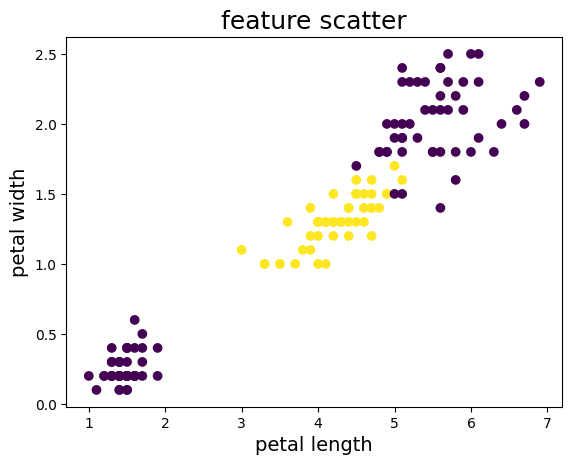

In [5]:
X = iris["data"][:, (2, 3)]
y = (iris['target'] == 1).astype(np.float64)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("petal length", fontsize = 14)
plt.ylabel("petal width", fontsize = 14)
plt.title("feature scatter", fontsize = 18)

In [6]:
# 데이터 확인해보기
# 이미 스케일링 되어있는거 같아
# 굳이 스케일링 안 할 수도 있지만 할 수도 있어
dfX = pd.DataFrame(iris.data, columns=iris.feature_names)
dfy = pd.DataFrame(iris.target, columns=['target'])

dfX.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
dfy.head()

,target
0,0
1,0
2,0
3,0
4,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)

In [9]:
# value를 뽑아와서 데이터로 사용하자
X_train = X_train.values
X_test = X_test.values

# 1차원 리스트로 반환
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

In [11]:
X_train[:2]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4]])

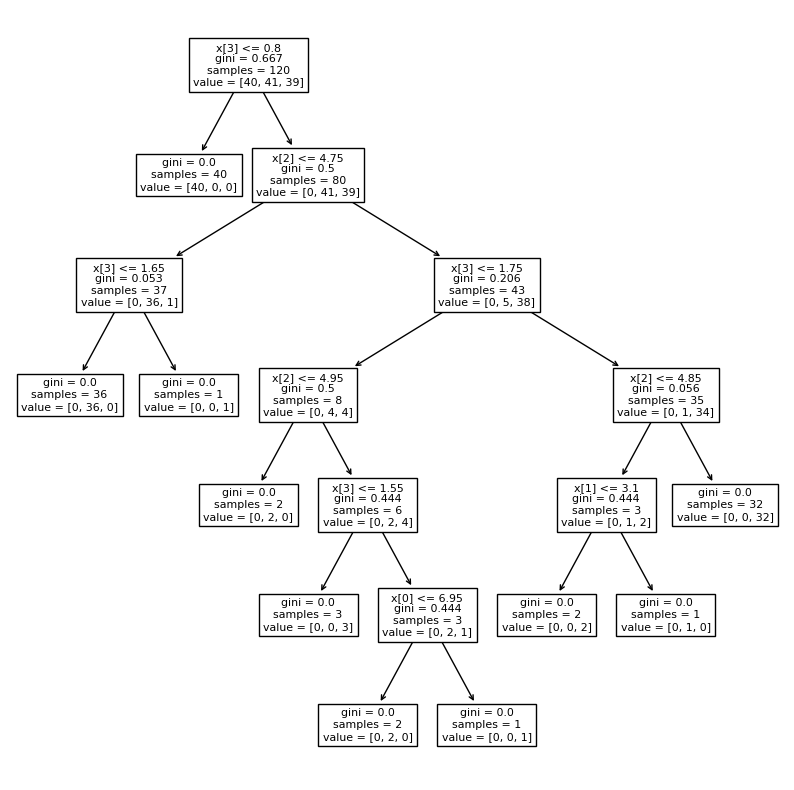

In [13]:
# 나무 그림 그려보기
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [15]:
# 실제로 예측해보기
y_pred = dtc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


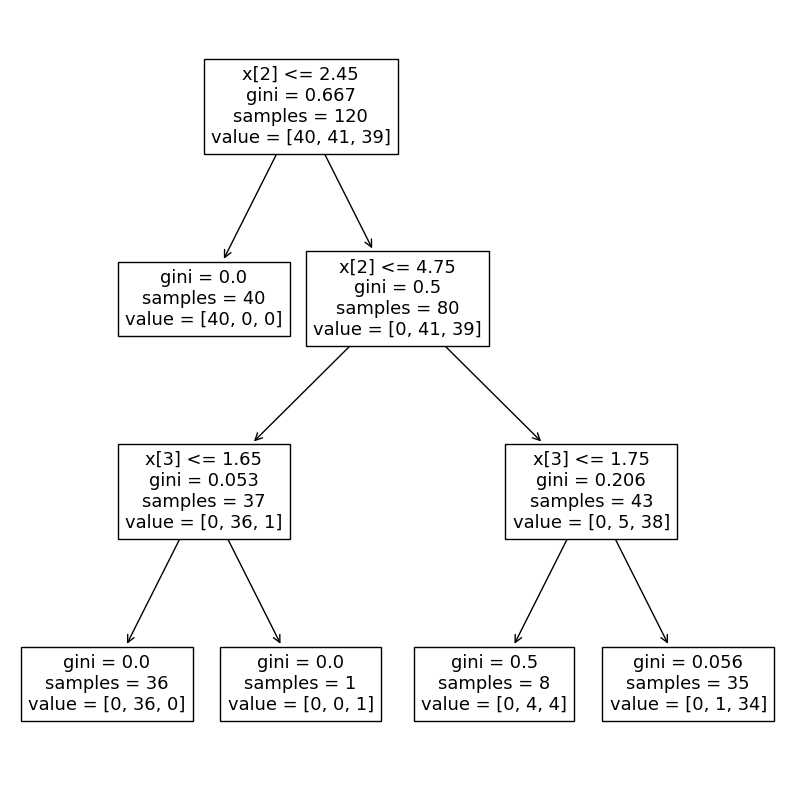

In [16]:
# 근데 나무가 너무 깊어 tree_depth를 조절해보자
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [17]:
# 깊이를 수정한 나무로 predict 해보
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


## 어제 했던 팽귄으로 해보장..

In [41]:
p = pd.read_csv('/content/penguins_size.csv')
pg = pd.DataFrame(p)
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [42]:
# 무슨 종이 있는지
target = pd.get_dummies(pg['species'])
target[:1]

,Adelie,Chinstrap,Gentoo
0,1,0,0


In [43]:
pg.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [44]:
# target 수정하기
pg['species'] = pg['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2])

In [45]:
# null 다 없애버리기
pg.dropna(inplace = True)

In [46]:
# check
pg.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,0,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,0,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,0,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,0,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [47]:
# 섬이랑, 성별 제외

X_data = pg.drop(['species', 'island', 'sex'], axis = 1)
y_data = pg['species']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.1, random_state = 3)

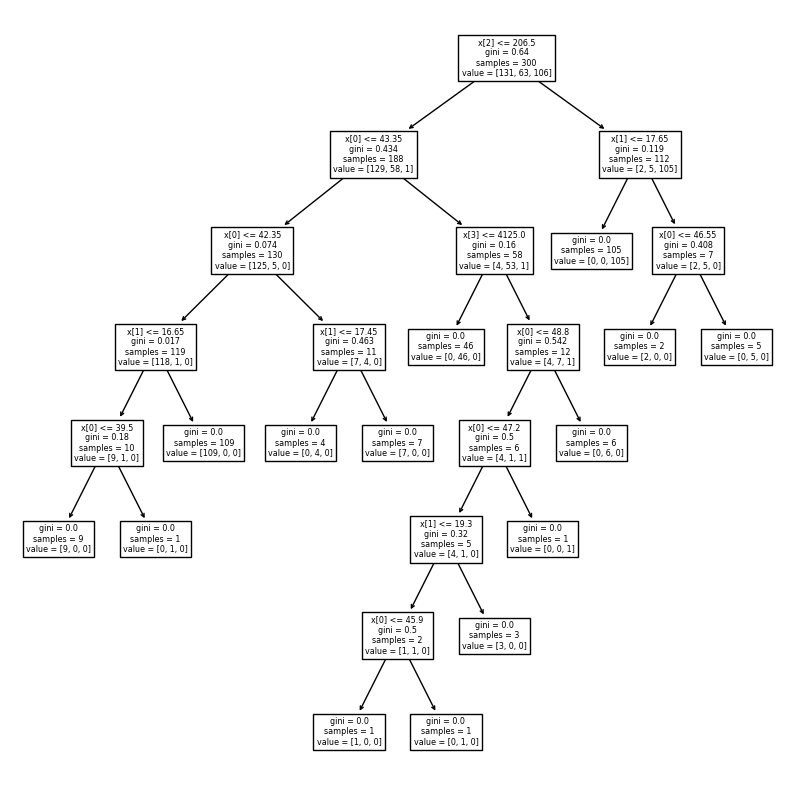

In [54]:
# 팽귄 트리 - 스케일러 안씀
p_tree = DecisionTreeClassifier()
p_tree.fit(X_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(p_tree)
plt.show()

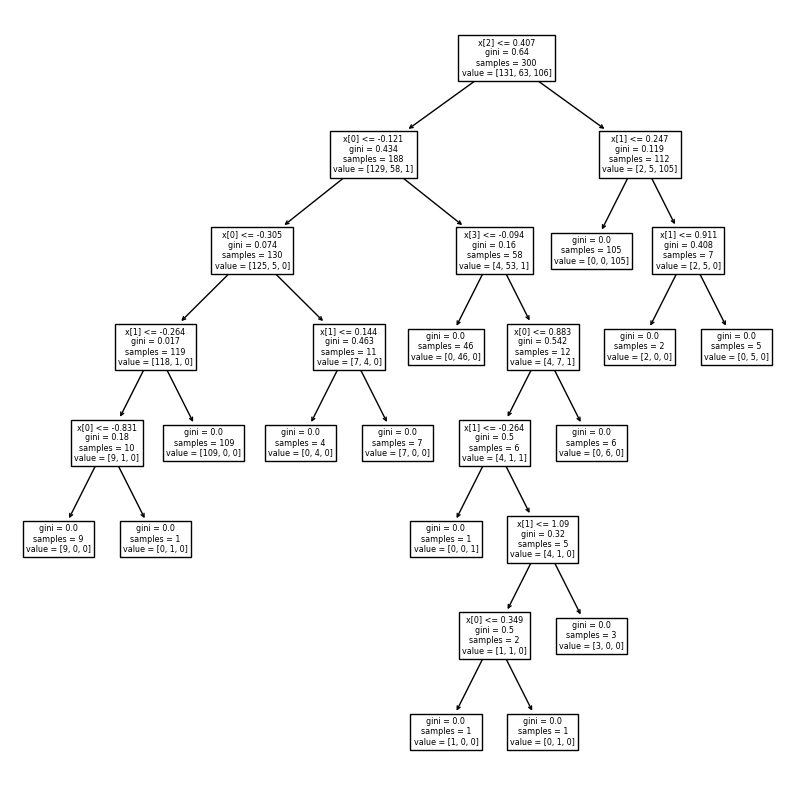

In [53]:
# 스케일러 해보기
std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)

p_tree2 = DecisionTreeClassifier()
p_tree2.fit(X_train_scaled, y_train)

plt.figure(figsize=(10,10))
plot_tree(p_tree2)
plt.show()